In [2]:
import pandas as pd
import pickle
import re
%pylab inline
import seaborn as sns

import os
sys.path.append(os.path.abspath("C:\\Users\\slueck\\OneDrive - Axel Springer SE\\Dokumente\\pylibs\\"))

from scatt_mat import factor_scatter_matrix

pd.set_option('mode.use_inf_as_na', True)

Populating the interactive namespace from numpy and matplotlib


## Read Data

In [3]:
dat = pd.read_pickle('visits_contract')

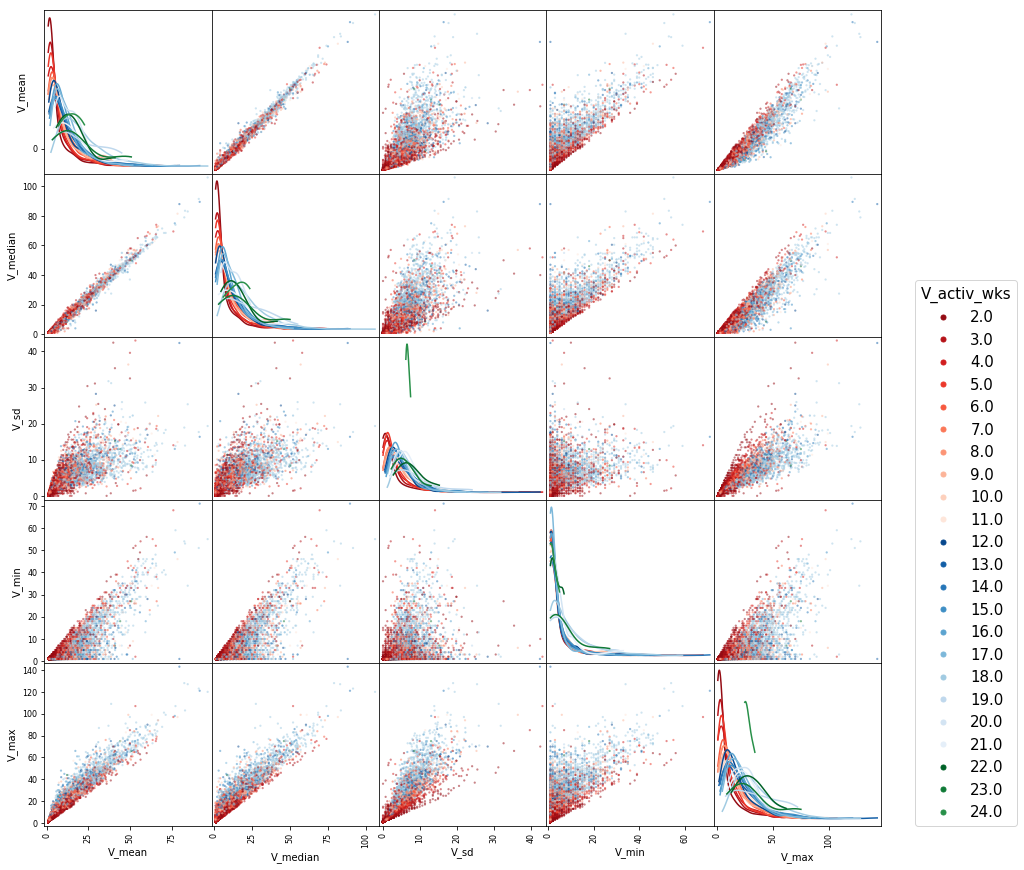

In [4]:
palette = sns.color_palette('Reds',10)[::-1]+ sns.color_palette('Blues',10)[::-1] + sns.color_palette('Greens',10)[::-1]
df = dat.loc[:,'V_mean':'V_max']
df_wo_inf_nan = df.dropna()

axarr, color_map = factor_scatter_matrix(df_wo_inf_nan,'V_activ_wks',palette=palette, markersize=5, figsize=15)

#### Filtern = aktive Nutzer

Nur Nutzer, die mind. 5 Wochen das Abo genutzt haben. 

Nur Nutzer die mindestens einen Mittelwert von 10 Visists pro Woche haben.

In [5]:
dat_actwks6 = dat.loc[dat['PI_activ_wks']>5]
dat_Vmean10 = dat_actwks6.loc[dat_actwks6['V_mean']>10]

### Verteilungen der PI von gekündigt/ungekündigt

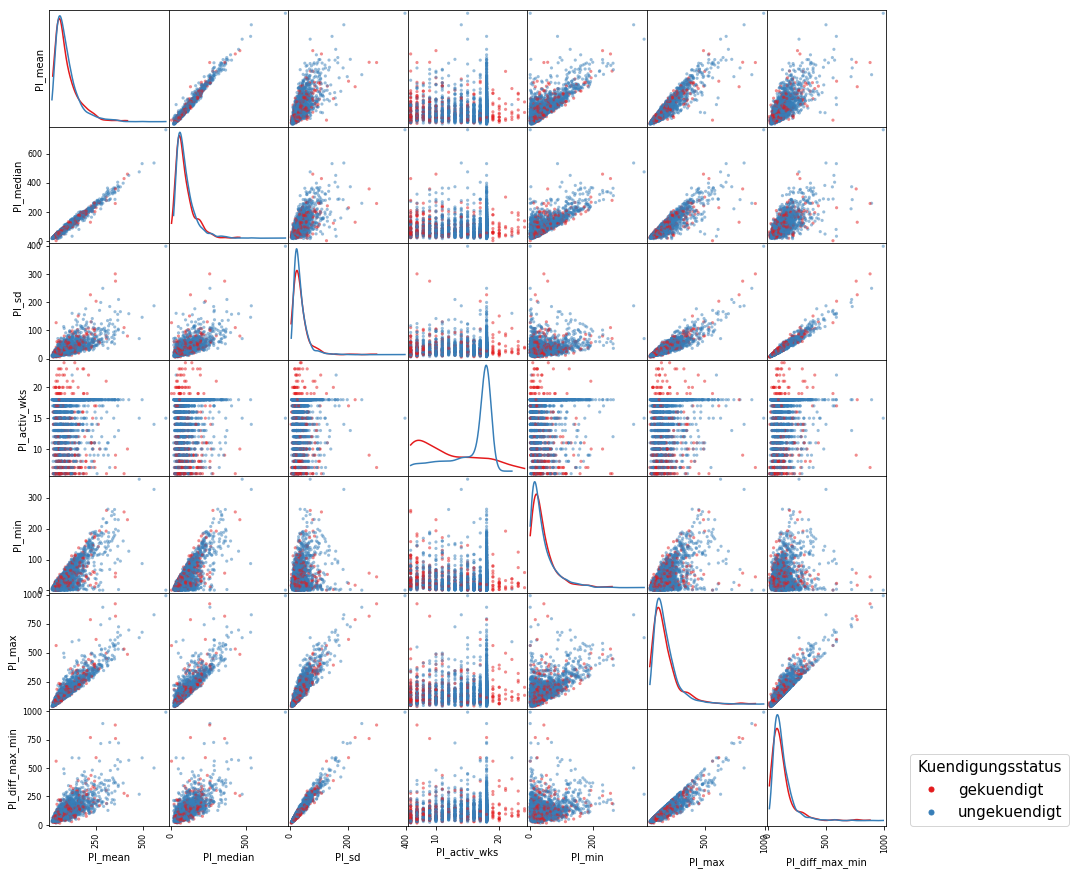

In [7]:
df = dat_Vmean10.loc[:,['PI_mean', 'PI_median',
       'PI_sd', 'PI_activ_wks', 'PI_min', 'PI_max','PI_diff_max_min','Kuendigungsstatus']]
df_wo_inf_nan = df.dropna()
axarr, color_map = factor_scatter_matrix(df_wo_inf_nan,'Kuendigungsstatus',figsize=15)



### Verteilungen der PI-Plus von gekündigt/ungekündigt

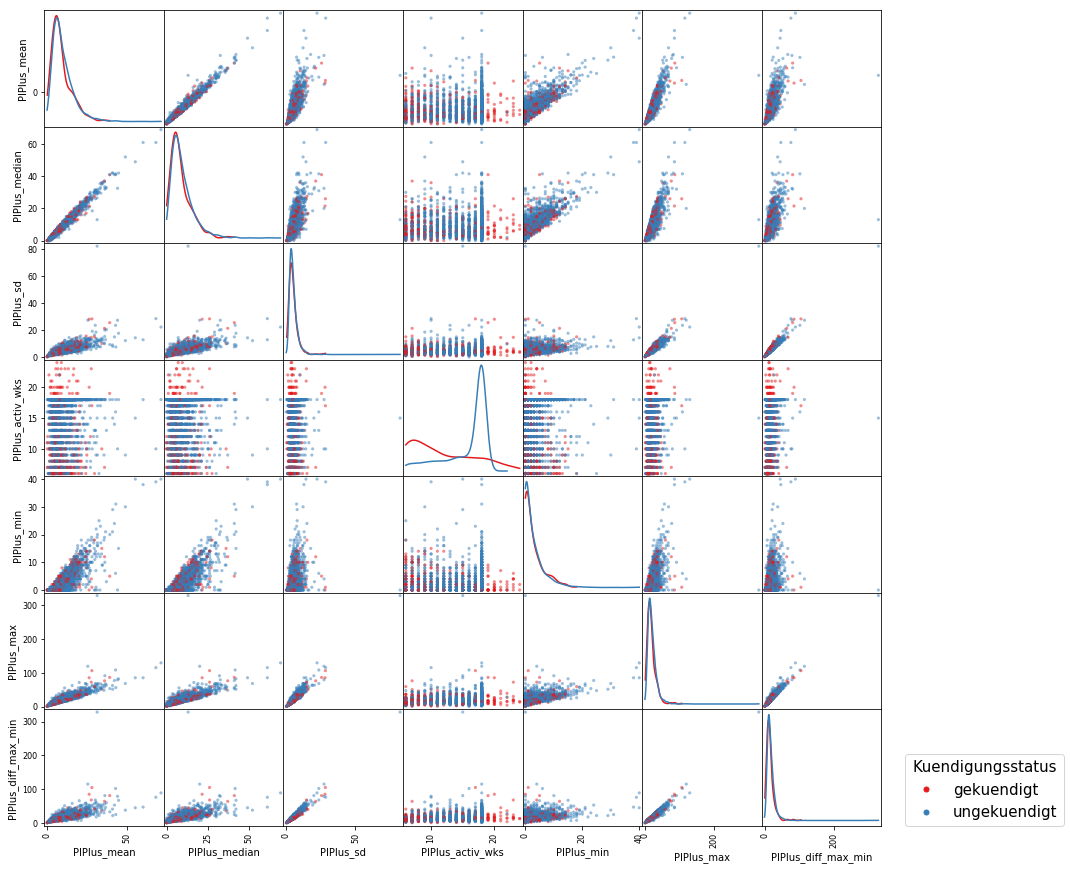

In [11]:
df = dat_Vmean10.loc[:,['PIPlus_mean', 'PIPlus_median',
       'PIPlus_sd', 'PIPlus_activ_wks', 'PIPlus_min', 'PIPlus_max','PIPlus_diff_max_min','Kuendigungsstatus']]
df_wo_inf_nan = df.dropna()

axarr, color_map = factor_scatter_matrix(df_wo_inf_nan,'Kuendigungsstatus',figsize=15)



Wie zu erwarten, unterscheiden sich die Verteilungen zischen gekündigten und ungekündigten Kunden nicht wesentlich, im Mittel verhalten sich beide Gruppen also gleich. Auffallend ist ein eine Anhäufung in der Anzahl der aktiven Wochen. Für ungekündigte Kunden gibt es maximal 18 aktive Wochen. Das deutet auf eienn Fehler in den Daten hin. 

## Verhalten vorm Kündigen

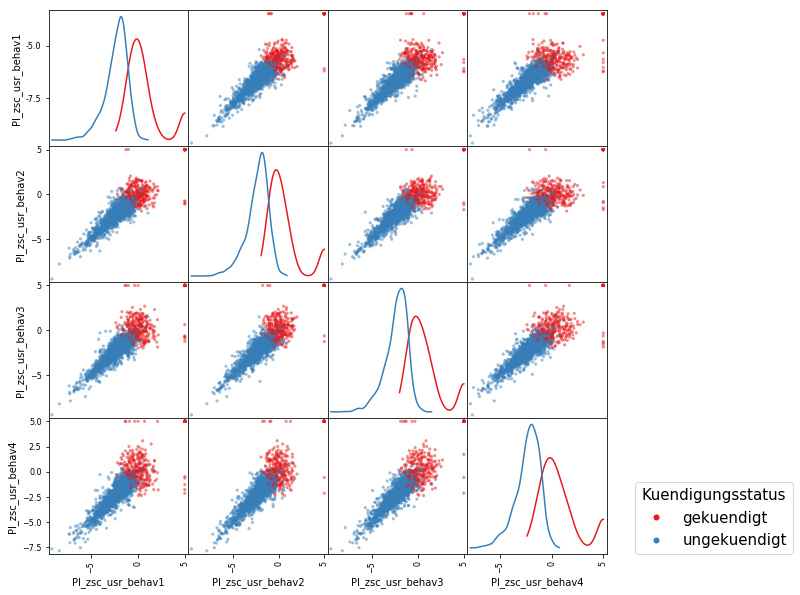

In [17]:
df = dat_Vmean10.loc[:,['PI_zsc_usr_behav1',
                        'PI_zsc_usr_behav2',
                        'PI_zsc_usr_behav3',
                        'PI_zsc_usr_behav4',
                        'Kuendigungsstatus']]
df_wo_inf = df.replace([-np.inf,np.inf],np.nan) 
df_wo_inf_na = df_wo_inf.fillna(5)
#df_wo_inf_na = df_wo_inf.dropna()


axarr, color_map = factor_scatter_matrix(df_wo_inf_na,'Kuendigungsstatus')


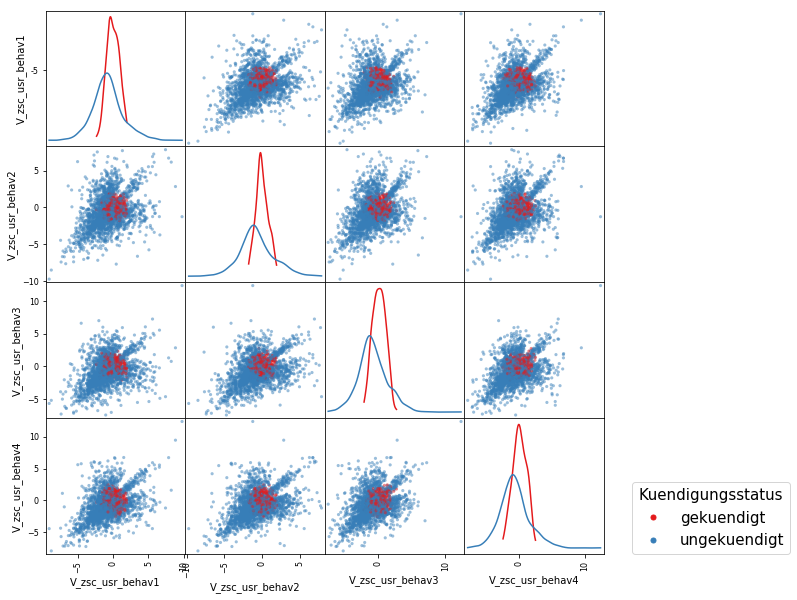

In [21]:
df = dat_Vmean10.loc[:,['V_zsc_usr_behav1','V_zsc_usr_behav2','V_zsc_usr_behav3','V_zsc_usr_behav4','Kuendigungsstatus']]
df_wo_nan_inf = df.dropna()
axarr, color_map = factor_scatter_matrix(df_wo_nan_inf,'Kuendigungsstatus')

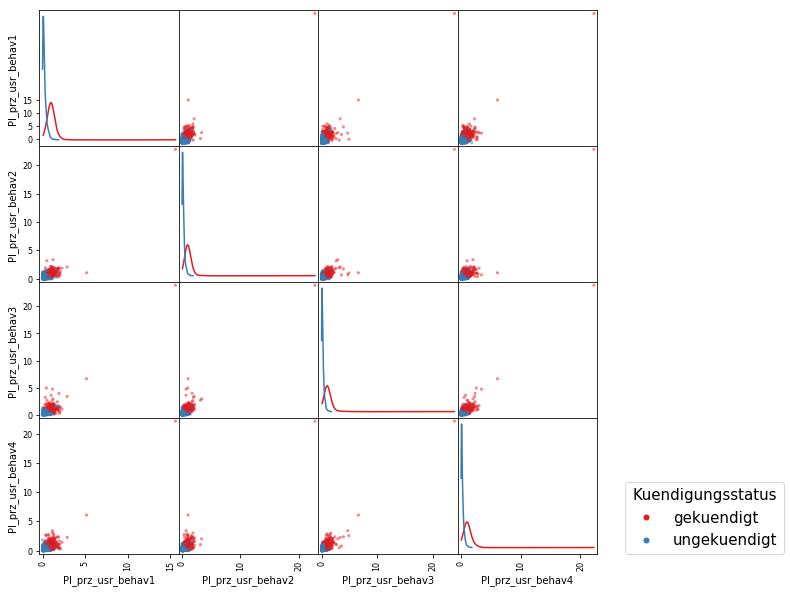

In [23]:
df = dat_Vmean10.loc[:,['PI_prz_usr_behav1',
                                                            'PI_prz_usr_behav2',
                                                            'PI_prz_usr_behav3', 
                                                            'PI_prz_usr_behav4',
                                                            'Kuendigungsstatus']]
df_wo_nan = df.dropna()
axarr, color_map = factor_scatter_matrix(df_wo_nan,'Kuendigungsstatus')

### Untersuchung des Fehlers in den Daten: max. 18 aktive Wochen für ungekündigte Kunden

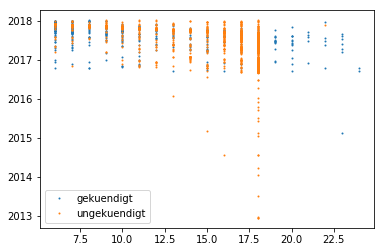

In [12]:
groups = dat_Vmean10.groupby('Kuendigungsstatus')
col = ['#feb236','#6b5b95']
fig, ax = plt.subplots()
#ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group['PI_activ_wks'], group['VB Tag'], marker='o', linestyle='', ms=1, label=name)
ax.legend()


In [13]:
#dat_Vmean10.hist('VB Tag',by='Kuendigungsstatus')
#dat_Vmean10.groupby('Kuendigungsstatus')['VB Tag'].hist()
dat_Vmean10.loc[(dat_Vmean10['PI_activ_wks']==18)&(dat_Vmean10['Kuendigungsstatus']=='ungekuendigt')].groupby('Promotion ID')['WT SSOID'].count()

Promotion ID
10003002    1100
10003006     106
10003011      36
Name: WT SSOID, dtype: int64

In [14]:
dat_Vmean10.loc[(dat_Vmean10['VB Tag'].dt.year<2016)&(dat_Vmean10['Kuendigungsstatus']=='ungekuendigt')].groupby('Promotion ID')['WT SSOID'].count()

Promotion ID
10003006     7
10003011    10
Name: WT SSOID, dtype: int64